In [161]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.metrics import roc_curve, auc, mean_squared_error, roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix

import category_encoders as ce
from category_encoders import WOEEncoder

In [43]:
main_df  = pd.read_csv('main.csv')

In [44]:
main_df

,index,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,basin,...,permit,construction_year,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,status_group
0,0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,unknown,Lake Nyasa,...,False,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,functional
1,2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,...,True,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,functional
2,3,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,...,True,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional
3,4,19728,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,...,True,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional
4,5,9944,20.0,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,Pangani,...,True,2009,submersible,vwc,pay per bucket,salty,enough,other,communal standpipe multiple,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47994,59394,11164,500.0,World Bank,351,ML appro,37.634053,-6.124830,Chimeredya,Wami / Ruvu,...,True,2007,submersible,vwc,pay monthly,soft,enough,machine dbh,communal standpipe,non functional
47995,59395,60739,10.0,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,Pangani,...,True,1999,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe,functional
47996,59396,27263,4700.0,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,...,True,1996,gravity,vwc,pay annually,soft,enough,river,communal standpipe,functional
47997,59398,31282,0.0,Malec,0,Musa,35.861315,-6.378573,Mshoro,Rufiji,...,True,0,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,functional


In [45]:
main_df.drop(columns = ['index'],inplace = True)

In [46]:
main_df['construction_year'].describe()

count    47999.000000
mean      1346.226859
std        935.986431
min          0.000000
25%          0.000000
50%       1988.000000
75%       2005.000000
max       2013.000000
Name: construction_year, dtype: float64

In [47]:
main_df['status_group'].replace(to_replace = 'functional', value = 1, inplace=True )


In [48]:
main_df['status_group'].replace(to_replace = 'non functional', value = 0, inplace=True )

In [49]:
target_transform = LabelEncoder()

main_df['permit'] = target_transform.fit_transform(main_df['permit'])


### lets drop a few columns that have a lot of categorial values, which might not be of much use in prediction

In [50]:
main_df.drop(columns = ['funder','installer','wpt_name','subvillage','construction_year','recorded_by'], inplace = True)

In [51]:
main_df

,id,amount_tsh,gps_height,longitude,latitude,basin,region,region_code,district_code,lga,...,public_meeting,permit,extraction_type,management,payment,water_quality,quantity,source,waterpoint_type,status_group
0,69572,6000.0,1390,34.938093,-9.856322,Lake Nyasa,Iringa,11,5,Ludewa,...,True,0,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,1
1,34310,25.0,686,37.460664,-3.821329,Pangani,Manyara,21,4,Simanjiro,...,True,1,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,1
2,67743,0.0,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,90,63,Nanyumbu,...,True,1,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,0
3,19728,0.0,0,31.130847,-1.825359,Lake Victoria,Kagera,18,1,Karagwe,...,True,1,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,1
4,9944,20.0,0,39.172796,-4.765587,Pangani,Tanga,4,8,Mkinga,...,True,1,submersible,vwc,pay per bucket,salty,enough,other,communal standpipe multiple,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47994,11164,500.0,351,37.634053,-6.124830,Wami / Ruvu,Morogoro,5,6,Mvomero,...,True,1,submersible,vwc,pay monthly,soft,enough,machine dbh,communal standpipe,0
47995,60739,10.0,1210,37.169807,-3.253847,Pangani,Kilimanjaro,3,5,Hai,...,True,1,gravity,water board,pay per bucket,soft,enough,spring,communal standpipe,1
47996,27263,4700.0,1212,35.249991,-9.070629,Rufiji,Iringa,11,4,Njombe,...,True,1,gravity,vwc,pay annually,soft,enough,river,communal standpipe,1
47997,31282,0.0,0,35.861315,-6.378573,Rufiji,Dodoma,1,4,Chamwino,...,True,1,nira/tanira,vwc,never pay,soft,insufficient,shallow well,hand pump,1


In [52]:
main_df.columns

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude', 'basin',
       'region', 'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'permit', 'extraction_type', 'management', 'payment',
       'water_quality', 'quantity', 'source', 'waterpoint_type',
       'status_group'],
      dtype='object')

In [53]:
main_df['ward'].value_counts()

Igosi           307
Imalinyi        247
Siha Kati       230
Mdandu          218
Nduruma         199
               ... 
Mawenzi           1
Matarawe          1
Mbinga Urban      1
Rasbura           1
Izia              1
Name: ward, Length: 1932, dtype: int64

In [54]:
main_df.drop(columns = ['lga','ward'], inplace = True)

In [155]:
main_df.drop(columns = ['id'], inplace = True)

In [55]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47999 entries, 0 to 47998
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               47999 non-null  int64  
 1   amount_tsh       47999 non-null  float64
 2   gps_height       47999 non-null  int64  
 3   longitude        47999 non-null  float64
 4   latitude         47999 non-null  float64
 5   basin            47999 non-null  object 
 6   region           47999 non-null  object 
 7   region_code      47999 non-null  int64  
 8   district_code    47999 non-null  int64  
 9   population       47999 non-null  int64  
 10  public_meeting   47999 non-null  bool   
 11  permit           47999 non-null  int64  
 12  extraction_type  47999 non-null  object 
 13  management       47999 non-null  object 
 14  payment          47999 non-null  object 
 15  water_quality    47999 non-null  object 
 16  quantity         47999 non-null  object 
 17  source      

In [56]:
numerical = ['amount_tsh','gps_height',
              'longitude','latitude','region_code','district_code','population','public_meeting','permit',
              'status_group']
categorical = ['basin','region','public_meeting','extraction_type','management','payment','water_quality',
            'quantity','source','waterpoint_type']

## Base Model

### Define the target variables and the predictors

In [57]:
X = main_df.drop(columns=['status_group','id'])
y= main_df['status_group']

## Doing Train-Test-Split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [59]:
X_train.shape

(33599, 18)

In [60]:
y_train.shape

(33599,)

In [61]:
X_test.shape

(14400, 18)

In [62]:
y_test.shape

(14400,)

### Defining the seperate pipelines for numeric and categorical features

In [63]:
numeric_pipeline = Pipeline([#('numimputer', SimpleImputer(strategy = 'mean')), 
                             ('numnorm', StandardScaler())])
categorical_pipeline = Pipeline([#('onehotimputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehotenc', OneHotEncoder(sparse = False, handle_unknown = 'ignore')),
    ('onehotnorm', MaxAbsScaler())])

In [64]:
num_cols = X_train.select_dtypes(['int', 'float']).columns
cat_cols = X_train.select_dtypes(['object']).columns

In [65]:
ct = ColumnTransformer(
    [("categorical_pipeline", categorical_pipeline, cat_cols),
     ("numeric_pipeline", numeric_pipeline, num_cols)])

In [66]:
ct

ColumnTransformer(transformers=[('categorical_pipeline',
                                 Pipeline(steps=[('onehotenc',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False)),
                                                 ('onehotnorm',
                                                  MaxAbsScaler())]),
                                 Index(['basin', 'region', 'extraction_type', 'management', 'payment',
       'water_quality', 'quantity', 'source', 'waterpoint_type'],
      dtype='object')),
                                ('numeric_pipeline',
                                 Pipeline(steps=[('numnorm',
                                                  StandardScaler())]),
                                 Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code',
       'district_code', 'population', 'permit'],
      dtype='object'))])

### Viewing the transformed data

In [67]:
pd.DataFrame(ct.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.014736,0.801821,0.924315,0.721742,-0.681304,-0.387467,-0.293786,-1.539045
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.119818,-0.972599,-0.743325,0.957942,0.201522,-0.185011,-0.391204,0.649754
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.119818,-0.972599,-1.142300,0.403413,-0.074361,-0.185011,-0.391204,0.649754
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.119818,1.514745,0.895492,0.872745,-0.681304,-0.488694,-0.389086,0.649754
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.119818,-0.972599,-0.507283,-1.304652,-0.184714,-0.286239,-0.391204,0.649754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33594,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.119818,-0.972599,-1.443223,1.389600,0.146346,-0.286239,-0.391204,0.649754
33595,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,-0.119818,1.194862,0.637840,0.864390,-0.736480,0.118672,-0.035416,0.649754
33596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,-0.014736,-0.476278,1.621939,-1.765151,-0.350244,-0.185011,0.667689,0.649754
33597,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.281270,0.375788,0.296754,-0.536141,-0.239891,-0.488694,-0.389086,0.649754


### Base model Logistic regression

In [68]:
final_pipeline = Pipeline([('preprocess', ct),
                      ('model',
                       LogisticRegression(random_state = 44))])

In [69]:
final_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical_pipeline',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  Index(['basin', 'region', 'extraction_type', 'management', 'payment',
       'water_quality', 'quantity', 'source', 'waterpoint_type'],
      dtype='object')),
                                                 ('numeric_pipeline',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),

### Fit the model pipeline

In [70]:
final_pipeline.fit(X_train, y_train)

/Users/karankurdia/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical_pipeline',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  Index(['basin', 'region', 'extraction_type', 'management', 'payment',
       'water_quality', 'quantity', 'source', 'waterpoint_type'],
      dtype='object')),
                                                 ('numeric_pipeline',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),

In [71]:
final_pipeline.score(X_test,y_test)

0.7840277777777778

In [72]:
y_pred = final_pipeline.predict(X_test)

In [73]:
class_names = ['0: non functional', '1: functional']
confusion_matrix(y_test, y_pred)

array([[3681, 2208],
       [ 902, 7609]])

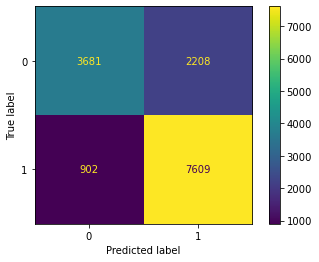

In [74]:
plot_confusion_matrix(final_pipeline, X_test, y_test)  
plt.show()

In [75]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.63      0.70      5889
           1       0.78      0.89      0.83      8511

    accuracy                           0.78     14400
   macro avg       0.79      0.76      0.77     14400
weighted avg       0.79      0.78      0.78     14400



In [77]:
pred_prob1 = final_pipeline.predict_proba(X_test)
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])

In [78]:
auc_score1

0.8485846201171363

In [79]:
y_pred_train = final_pipeline.predict(X_train)

In [80]:
cost_function1 =  mean_squared_error(y_train, y_pred_train)
cost_function2 =  mean_squared_error(y_test, y_pred)

In [81]:
cost_function1

0.20967885948986578

In [82]:
cost_function2

0.21597222222222223

In [83]:
final_pipeline.score(X_train, y_train)

0.7903211405101342

In [84]:
final_pipeline.score(X_test, y_test)

0.7840277777777778

### Hyperparameter tuning

In [85]:
final_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocess', 'model', 'preprocess__n_jobs', 'preprocess__remainder', 'preprocess__sparse_threshold', 'preprocess__transformer_weights', 'preprocess__transformers', 'preprocess__verbose', 'preprocess__categorical_pipeline', 'preprocess__numeric_pipeline', 'preprocess__categorical_pipeline__memory', 'preprocess__categorical_pipeline__steps', 'preprocess__categorical_pipeline__verbose', 'preprocess__categorical_pipeline__onehotenc', 'preprocess__categorical_pipeline__onehotnorm', 'preprocess__categorical_pipeline__onehotenc__categories', 'preprocess__categorical_pipeline__onehotenc__drop', 'preprocess__categorical_pipeline__onehotenc__dtype', 'preprocess__categorical_pipeline__onehotenc__handle_unknown', 'preprocess__categorical_pipeline__onehotenc__sparse', 'preprocess__categorical_pipeline__onehotnorm__copy', 'preprocess__numeric_pipeline__memory', 'preprocess__numeric_pipeline__steps', 'preprocess__numeric_pipeline__verbose', 'preprocess__numer

In [86]:
space = dict()
space['model__solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['model__penalty'] = [ 'l1', 'l2', 'elasticnet']
space['model__C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1]

clf = GridSearchCV(final_pipeline, space, cv = 5, scoring='precision', n_jobs=-1)

In [87]:
result = clf.fit(X_train, y_train)

/Users/karankurdia/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7761507225236394
Best Hyperparameters: {'model__C': 1, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}


In [89]:
result.best_score_

0.7761507225236394

### getting the best model

In [90]:
best_model = result.best_estimator_
best_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical_pipeline',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  Index(['basin', 'region', 'extraction_type', 'management', 'payment',
       'water_quality', 'quantity', 'source', 'waterpoint_type'],
      dtype='object')),
                                                 ('numeric_pipeline',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),

In [91]:
y_pred_1 = best_model.predict(X_test)

In [92]:
confusion_matrix(y_test, y_pred_1)

array([[3681, 2208],
       [ 902, 7609]])

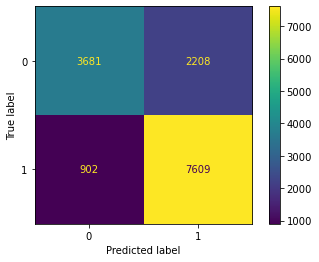

In [93]:
plot_confusion_matrix(best_model, X_test, y_test)  
plt.show()

In [94]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.80      0.63      0.70      5889
           1       0.78      0.89      0.83      8511

    accuracy                           0.78     14400
   macro avg       0.79      0.76      0.77     14400
weighted avg       0.79      0.78      0.78     14400



In [95]:
pred_prob2 = best_model.predict_proba(X_test)

In [96]:
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

In [97]:
auc_score2

0.8485846201171363

In [98]:

acc_log = accuracy_score(y_test,y_pred_1) * 100

In [99]:
acc_log

78.40277777777777

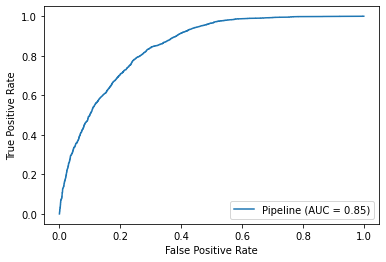

In [100]:
plot_roc_curve(best_model, X_test, y_test)

In [101]:
columns_log = ['Class Label', 'Precision', 'Recall', 'F1 Score', 'Support']

class_labels_log = ['1: functional', '0: non functional']

precision_scores_log = [0.80, 0.78]
recall_scores_log = [0.63, 0.89]
f1_scores_log = [0.70, 0.83]
supports_log = [5889, 8511]
combined_metrics_log = list(zip(class_labels_log, precision_scores_log, recall_scores_log,
                                f1_scores_log, supports_log))
compiled_log_df = pd.DataFrame(combined_metrics_log, columns=columns_log)
print('Logistic Metrics:')
compiled_log_df

Logistic Metrics:


,Class Label,Precision,Recall,F1 Score,Support
0,1: functional,0.80,0.63,0.70,5889
1,0: non functional,0.78,0.89,0.83,8511


## KNN

### KNN Pipeline

In [102]:
knn_pipeline = Pipeline([('preprocess', ct),
                      ('model',
                       KNeighborsClassifier())])

In [103]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical_pipeline',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  Index(['basin', 'region', 'extraction_type', 'management', 'payment',
       'water_quality', 'quantity', 'source', 'waterpoint_type'],
      dtype='object')),
                                                 ('numeric_pipeline',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),

In [104]:
knn_pipeline.score(X_test,y_test)

0.8219444444444445

In [105]:
y_pred_knn = knn_pipeline.predict(X_test)

In [106]:
y_pred_train_knn = knn_pipeline.predict(X_train)

In [107]:
confusion_matrix(y_test, y_pred_knn)

array([[4329, 1560],
       [1004, 7507]])

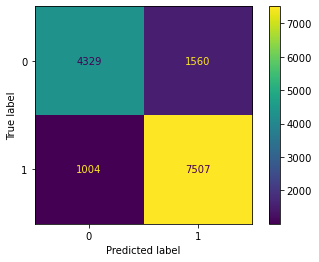

In [108]:
plot_confusion_matrix(knn_pipeline, X_test, y_test)  
plt.show()

In [109]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77      5889
           1       0.83      0.88      0.85      8511

    accuracy                           0.82     14400
   macro avg       0.82      0.81      0.81     14400
weighted avg       0.82      0.82      0.82     14400



In [110]:
pred_prob_knn = knn_pipeline.predict_proba(X_test)
auc_score_knn = roc_auc_score(y_test, pred_prob_knn[:,1])

In [111]:
auc_score_knn

0.8830193160074786

In [112]:
# cost function
cost_function3 =  mean_squared_error(y_train, y_pred_train_knn)
cost_function4 =  mean_squared_error(y_test, y_pred_knn)

In [113]:
print("error for train {}".format(cost_function3))
print("error for test {}".format(cost_function4))

error for train 0.12518229709217535
error for test 0.17805555555555555


In [114]:
knn_pipeline.score(X_train, y_train)
knn_pipeline.score(X_test, y_test)

0.8219444444444445

## Knn Hyperparameter tuning

In [115]:
knn_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocess', 'model', 'preprocess__n_jobs', 'preprocess__remainder', 'preprocess__sparse_threshold', 'preprocess__transformer_weights', 'preprocess__transformers', 'preprocess__verbose', 'preprocess__categorical_pipeline', 'preprocess__numeric_pipeline', 'preprocess__categorical_pipeline__memory', 'preprocess__categorical_pipeline__steps', 'preprocess__categorical_pipeline__verbose', 'preprocess__categorical_pipeline__onehotenc', 'preprocess__categorical_pipeline__onehotnorm', 'preprocess__categorical_pipeline__onehotenc__categories', 'preprocess__categorical_pipeline__onehotenc__drop', 'preprocess__categorical_pipeline__onehotenc__dtype', 'preprocess__categorical_pipeline__onehotenc__handle_unknown', 'preprocess__categorical_pipeline__onehotenc__sparse', 'preprocess__categorical_pipeline__onehotnorm__copy', 'preprocess__numeric_pipeline__memory', 'preprocess__numeric_pipeline__steps', 'preprocess__numeric_pipeline__verbose', 'preprocess__numer

In [116]:
space_knn = {
             'model__n_neighbors': [3, 11, 15],
             'model__p': [1, 2]}


clf = GridSearchCV(knn_pipeline, space_knn, scoring='roc_auc', n_jobs=-1)

In [117]:
knn_result = clf.fit(X_train, y_train)

In [118]:
print('Best Score: %s' % knn_result.best_score_)
print('Best Hyperparameters: %s' % knn_result.best_params_)

Best Score: 0.888103189355915
Best Hyperparameters: {'model__n_neighbors': 11, 'model__p': 1}


In [119]:
knn_best_model = knn_result.best_estimator_
knn_best_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical_pipeline',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  Index(['basin', 'region', 'extraction_type', 'management', 'payment',
       'water_quality', 'quantity', 'source', 'waterpoint_type'],
      dtype='object')),
                                                 ('numeric_pipeline',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),

In [120]:
knn_best_model.score(X_test,y_test)

0.8197222222222222

In [121]:
y_pred_knn_best = knn_best_model.predict(X_test)

In [122]:
confusion_matrix(y_test, y_pred_knn_best)

array([[4237, 1652],
       [ 944, 7567]])

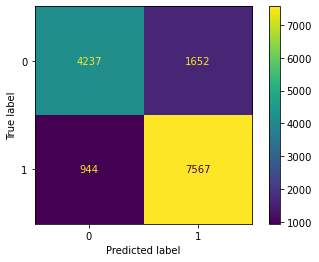

In [123]:
plot_confusion_matrix(knn_best_model, X_test, y_test)  
plt.show()

In [124]:
pred_prob_knn_best = knn_best_model.predict_proba(X_test)
auc_score_knn_best = roc_auc_score(y_test, pred_prob_knn_best[:,1])

In [125]:
auc_score_knn_best

0.8910045571662286

In [126]:
print(classification_report(y_test, y_pred_knn_best))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      5889
           1       0.82      0.89      0.85      8511

    accuracy                           0.82     14400
   macro avg       0.82      0.80      0.81     14400
weighted avg       0.82      0.82      0.82     14400



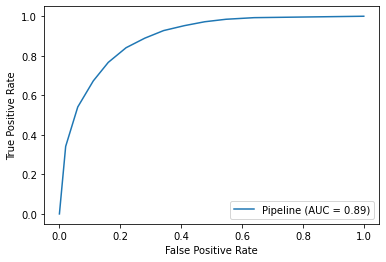

In [127]:
plot_roc_curve(knn_best_model, X_test, y_test)

In [128]:
from sklearn.metrics import accuracy_score
acc_knn = accuracy_score(y_test,y_pred_knn_best) * 100

In [129]:
acc_knn

81.97222222222223

In [130]:
columns_knn = ['Class Label', 'Precision', 'Recall', 'F1 Score', 'Support']

class_labels_knn = ['1: functional', '0: non functional']

precision_scores_k = [0.82, 0.82]
recall_scores_k = [0.77, 0.85]
f1_scores_k = [0.81, 0.88]
supports_k = [5889, 8511]
combined_metrics_knn = list(zip(class_labels_knn, precision_scores_k, recall_scores_k,
                                f1_scores_k, supports_k))
compiled_knn_df = pd.DataFrame(combined_metrics_knn, columns=columns_knn)
print('Knn Metrics:')
compiled_knn_df

Knn Metrics:


,Class Label,Precision,Recall,F1 Score,Support
0,1: functional,0.82,0.77,0.81,5889
1,0: non functional,0.82,0.85,0.88,8511


## Random Forest

In [131]:
random_pipeline = Pipeline([('preprocess', ct),
                      ('model',
                       RandomForestClassifier())])

In [132]:
random_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical_pipeline',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  Index(['basin', 'region', 'extraction_type', 'management', 'payment',
       'water_quality', 'quantity', 'source', 'waterpoint_type'],
      dtype='object')),
                                                 ('numeric_pipeline',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),

In [133]:
y_pred_random = random_pipeline.predict(X_test)

In [134]:
pred_prob_random = random_pipeline.predict_proba(X_test)
auc_score_random = roc_auc_score(y_test, pred_prob_random[:,1])

In [135]:
auc_score_random

0.9156596542558302

In [136]:
confusion_matrix(y_test, y_pred_random)

array([[4613, 1276],
       [ 881, 7630]])

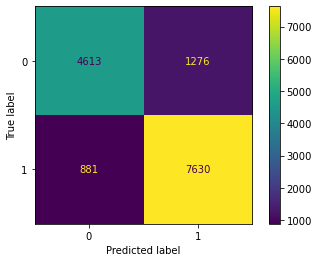

In [137]:
plot_confusion_matrix(random_pipeline, X_test, y_test)  
plt.show()

In [138]:
print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      5889
           1       0.86      0.90      0.88      8511

    accuracy                           0.85     14400
   macro avg       0.85      0.84      0.84     14400
weighted avg       0.85      0.85      0.85     14400



###  Random forest Hyperparameter tuning

In [139]:
random_pipeline.get_params()

{'memory': None,
 'steps': [('preprocess',
   ColumnTransformer(transformers=[('categorical_pipeline',
                                    Pipeline(steps=[('onehotenc',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False)),
                                                    ('onehotnorm',
                                                     MaxAbsScaler())]),
                                    Index(['basin', 'region', 'extraction_type', 'management', 'payment',
          'water_quality', 'quantity', 'source', 'waterpoint_type'],
         dtype='object')),
                                   ('numeric_pipeline',
                                    Pipeline(steps=[('numnorm',
                                                     StandardScaler())]),
                                    Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code',
          

In [140]:
space_random = {
                 'model__bootstrap': [True],
             'model__max_features': ['auto'],
             'model__min_samples_leaf': [1,3, 4, 5],
             'model__min_samples_split': [2,4,6,8, 10, 12],
             'model__n_estimators': [100, 200, 300, 1000]}
clf = GridSearchCV(random_pipeline,space_random, scoring='roc_auc', n_jobs=-1)

In [141]:
random_result = clf.fit(X_train, y_train)

In [142]:
print('Best Score: %s' % random_result.best_score_)
print('Best Hyperparameters: %s' % random_result.best_params_)

Best Score: 0.9182786005457866
Best Hyperparameters: {'model__bootstrap': True, 'model__max_features': 'auto', 'model__min_samples_leaf': 1, 'model__min_samples_split': 8, 'model__n_estimators': 1000}


In [143]:
random_best_model = random_result.best_estimator_
random_best_model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical_pipeline',
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  Index(['basin', 'region', 'extraction_type', 'management', 'payment',
       'water_quality', 'quantity', 'source', 'waterpoint_type'],
      dtype='object')),
                                                 ('numeric_pipeline',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),

In [ ]:
y_pred_random_best = random_best_model.predict(X_test)

In [ ]:
pred_prob_random = random_best_model.predict_proba(X_test)
auc_score_random_best = roc_auc_score(y_test, pred_prob_random[:,1])

In [ ]:
auc_score_random_best

In [ ]:
confusion_matrix(y_test, y_pred_random_best)

In [ ]:
plot_confusion_matrix(random_best_model, X_test, y_test)  
plt.show()

In [ ]:
plot_roc_curve(random_best_model, X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred_random_best))

In [ ]:
columns_ran = ['Class Label', 'Precision', 'Recall', 'F1 Score', 'Support']

class_labels_ran = ['1: functional', '0: non functional']

precision_scores_ran = [0.86, 0.85]
recall_scores_ran = [0.77, 0.91]
f1_scores_ran = [0.81, 0.88]
supports_ran = [5889, 8511]

In [ ]:
combined_metrics_ran = list(zip(class_labels_ran, precision_scores_ran,
                                recall_scores_ran, f1_scores_ran, 
                                supports_ran))

In [ ]:
compiled_ran_df = pd.DataFrame(combined_metrics_ran, columns=columns_ran)
print('Random Forest Metrics:')
compiled_ran_df

In [ ]:
from sklearn.metrics import accuracy_score
acc_random = accuracy_score(y_test,y_pred_random_best) * 100

In [ ]:
acc_random

### XGBoost


In [ ]:
xgb_pipeline = Pipeline([('preprocess', ct),
                      ('model',
                       XGBClassifier())])

In [ ]:
xgb_pipeline.fit(X_train, y_train)

In [ ]:
y_pred_xgb = xgb_pipeline.predict(X_test)

In [ ]:
pred_prob_xgb = xgb_pipeline.predict_proba(X_test)
auc_score_xgb = roc_auc_score(y_test, pred_prob_xgb[:,1])

In [ ]:
auc_score_xgb

In [ ]:
confusion_matrix(y_test, y_pred_xgb)

In [ ]:
plot_confusion_matrix(xgb_pipeline, X_test, y_test)  
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_xgb))

## XBG Classifier Hypertuning

In [ ]:
xgb_pipeline.get_params()

In [ ]:
space_xgb = {
             'model__learning_rate': [0.1, 0.2],
             'model__max_depth': [6],
             'model___min_child_weight': [1, 2],
             'model__subsample': [0.5, 0.7],
             'model__n_estimators': [100]}
clf = GridSearchCV(xgb_pipeline,space_xgb, scoring='roc_auc', n_jobs=-1)

In [ ]:
xgb_result = clf.fit(X_train, y_train)

In [ ]:
print('Best Score: %s' % xgb_result.best_score_)
print('Best Hyperparameters: %s' % xgb_result.best_params_)

In [ ]:
xgb_best_model = xgb_result.best_estimator_
xgb_best_model

In [ ]:
y_pred_xgb_best = xgb_best_model.predict(X_test)

In [ ]:
pred_prob_best_xgb = xgb_best_model.predict_proba(X_test)
auc_score_best_xgb = roc_auc_score(y_test, pred_prob_best_xgb[:,1])

In [ ]:
auc_score_best_xgb

In [ ]:
confusion_matrix(y_test, y_pred_xgb_best)

In [ ]:
plot_confusion_matrix(xgb_best_model, X_test, y_test)  
plt.show()

In [ ]:
plot_roc_curve(xgb_best_model, X_test, y_test)

In [ ]:
print(classification_report(y_test, y_pred_xgb_best))

In [ ]:
from sklearn.metrics import accuracy_score
acc_xgb = accuracy_score(y_test,y_pred_xgb_best) * 100

In [ ]:
acc_xgb

In [ ]:
columns_xbg = ['Class Label', 'Precision', 'Recall', 'F1 Score', 'Support']

class_labels_xbg = ['1: functional', '0: non functional']

precision_scores_x = [0.86, 0.82]
recall_scores_x = [0.72, 0.92]
f1_scores_x = [0.78, 0.87]
supports_x = [5889, 8511]
combined_metrics_xbg = list(zip(class_labels_xbg, precision_scores_x, recall_scores_x,
                                f1_scores_x, supports_x))
compiled_xbg_df = pd.DataFrame(combined_metrics_xbg, columns=columns_xbg)
print('Xbg Metrics:')
compiled_xbg_df

In [181]:
columns_sum = ['Class Label','Model Name','AUC', 'Accuracy%']

class_labels_sum = ['Base_Model','Model1','Model2','Model3']

model_name = ['Log','Knn','XGB','Random']
AUC = [0.85, 0.89, 0.91, 0.92]
Accuracy = [78, 82, 83, 85]

combined_metrics_sum = list(zip(class_labels_sum, model_name, AUC, 
                                Accuracy))
compiled_sum_df = pd.DataFrame(combined_metrics_sum, columns=columns_sum)
print('Summary Metrics:')
compiled_sum_df

Summary Metrics:


,Class Label,Model Name,AUC,Accuracy%
0,Base_Model,Log,0.85,78
1,Model1,Knn,0.89,82
2,Model2,XGB,0.91,83
3,Model3,Random,0.92,85


### Feature Engineering on Best Performing Model

In [156]:
random_df=main_df.copy()

In [157]:
random_df.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'basin', 'region',
       'region_code', 'district_code', 'population', 'public_meeting',
       'permit', 'extraction_type', 'management', 'payment', 'water_quality',
       'quantity', 'source', 'waterpoint_type', 'status_group'],
      dtype='object')

In [165]:
encoder = WOEEncoder()

for c in categorical:
    random_df[str(c) + '_encoded'] = encoder.fit_transform(random_df[c].values, random_df['status_group'])
    random_df.drop(columns=c, inplace=True) 

In [176]:
random_df.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code',
       'district_code', 'population', 'permit', 'status_group',
       'basin_encoded', 'region_encoded', 'public_meeting_encoded',
       'extraction_type_encoded', 'management_encoded', 'payment_encoded',
       'water_quality_encoded', 'quantity_encoded', 'source_encoded',
       'waterpoint_type_encoded'],
      dtype='object')

In [166]:
X1=random_df.drop(columns = ['status_group'])
y1=random_df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [180]:
X1.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code',
       'district_code', 'population', 'permit', 'basin_encoded',
       'region_encoded', 'public_meeting_encoded', 'extraction_type_encoded',
       'management_encoded', 'payment_encoded', 'water_quality_encoded',
       'quantity_encoded', 'source_encoded', 'waterpoint_type_encoded'],
      dtype='object')

In [172]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42, bootstrap = True,
                           min_samples_split = 8, min_samples_leaf = 1)

In [174]:
rf.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=8, n_estimators=1000, random_state=42)

Feature ranking:
1. feature 15 (0.178185)
2. feature 2 (0.122915)
3. feature 3 (0.118791)
4. feature 11 (0.096336)
5. feature 17 (0.091233)
6. feature 1 (0.067477)
7. feature 13 (0.046296)
8. feature 6 (0.044528)
9. feature 16 (0.035046)
10. feature 0 (0.034327)
11. feature 9 (0.032313)
12. feature 12 (0.031029)
13. feature 5 (0.028856)
14. feature 8 (0.021715)
15. feature 4 (0.019697)
16. feature 14 (0.013486)
17. feature 7 (0.010295)
18. feature 10 (0.007473)


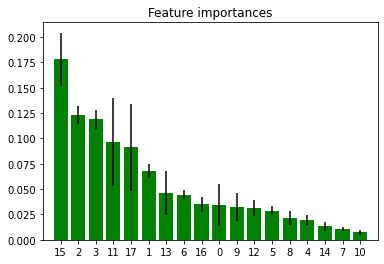

In [188]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Printing the feature ranking
print("Feature ranking:")

for f in range(X1.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotting the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X1.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X1.shape[1]), indices)
plt.xlim([-1, X1.shape[1]])
plt.show()

In [182]:
X1.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code',
       'district_code', 'population', 'permit', 'basin_encoded',
       'region_encoded', 'public_meeting_encoded', 'extraction_type_encoded',
       'management_encoded', 'payment_encoded', 'water_quality_encoded',
       'quantity_encoded', 'source_encoded', 'waterpoint_type_encoded'],
      dtype='object')

In [185]:
columns_features = ['Features','Feature_name']

feature_num = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]

feature_name = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code',
       'district_code', 'population', 'permit', 'basin',
       'region', 'public_meeting', 'extraction_type',
       'management', 'payment', 'water_quality',
       'quantity', 'source', 'waterpoint_type']



combined_metrics_feature = list(zip( feature_num, feature_name))
compiled_feature_df = pd.DataFrame(combined_metrics_feature, columns=columns_features)
print('Features Metrics:')
compiled_feature_df

Features Metrics:


,Features,Feature_name
0,0,amount_tsh
1,1,gps_height
2,2,longitude
3,3,latitude
4,4,region_code
5,5,district_code
6,6,population
7,7,permit
8,8,basin
9,9,region


#### Quantity, longitude, latitude, extraction_type, waterpoint_type, gps_height, payment are the best performing features in predicting the target variable
